In [1]:
import os
import sys
from pathlib import Path
from typing import Union, Optional, Sequence, Mapping
import time
import logging
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import scanpy as sc
from scipy import sparse

In [2]:
CAME_PATH = Path('E:/lxy_pro/004/CAME')
sys.path.append(str(CAME_PATH))
import came
from came import pipeline, pp, pl


In [3]:
datadir = Path(r'F:\external_data\human_hipp')
adt = sc.read_h5ad(datadir / 'raw-humanHipp.h5ad')
adt

AnnData object with n_obs × n_vars = 33128 × 32738

In [4]:
adt.var_names


Index(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092',
       'ENSG00000238009', 'ENSG00000239945', 'ENSG00000237683',
       'ENSG00000239906', 'ENSG00000241599', 'ENSG00000228463',
       'ENSG00000237094',
       ...
       'ENSG00000217792', 'ENSG00000268276', 'ENSG00000148828',
       'ENSG00000215700', 'ENSG00000215699', 'ENSG00000215635',
       'ENSG00000268590', 'ENSG00000251180', 'ENSG00000215616',
       'ENSG00000215611'],
      dtype='object', length=32738)

In [5]:
dirg = Path(r'E:\lxy_pro\004\resources\mart_exports\gene_info')
ginfo = pd.read_csv(dirg / 'gene_info-human.csv',)
ginfo.index = ginfo['Gene stable ID']
ginfo['Gene name'] = ginfo[['Gene name', 'Gene stable ID']].apply(
    lambda x: x[0] if pd.notna(x[0]) else x[1], axis=1)
ginfo
# adt.var = ginfo

Gene stable ID Gene stable ID version Gene name  \
Gene stable ID                                                      
ENSG00000210049  ENSG00000210049      ENSG00000210049.1     MT-TF   
ENSG00000211459  ENSG00000211459      ENSG00000211459.2   MT-RNR1   
ENSG00000210077  ENSG00000210077      ENSG00000210077.1     MT-TV   
ENSG00000210082  ENSG00000210082      ENSG00000210082.2   MT-RNR2   
ENSG00000209082  ENSG00000209082      ENSG00000209082.1    MT-TL1   
...                          ...                    ...       ...   
ENSG00000163263  ENSG00000163263      ENSG00000163263.7   CFAP141   
ENSG00000143612  ENSG00000143612     ENSG00000143612.21   C1orf43   
ENSG00000143569  ENSG00000143569     ENSG00000143569.19    UBAP2L   
ENSG00000201129  ENSG00000201129      ENSG00000201129.1  SNORA58B   
ENSG00000143575  ENSG00000143575     ENSG00000143575.15      HAX1   

                Source of gene name  
Gene stable ID                       
ENSG00000210049         HGNC Symbol  
ENSG00000211459         HGNC Symbol  
ENSG00000210077         HGNC Symbol  
ENSG00000210082         HGNC Symbol  
ENSG00000209082         HGNC Symbol  
...                             ...  
ENSG00000163263         HGNC Symbol  
ENSG00000143612         HGNC Symbol  
ENSG00000143569         HGNC Symbol  
ENSG00000201129         HGNC Symbol  
ENSG00000143575         HGNC Symbol  

[68016 rows x 4 columns]

In [6]:
ginfo['Gene name'].isna().value_counts()

False    68016
Name: Gene name, dtype: int64

In [7]:
adt.var['ID'] = adt.var_names
adt.var['name'] = ginfo['Gene name']
adt.var['name'] = list(map(lambda x1, x2: x1 if pd.notna(x1) else x2,
                         adt.var['name'], adt.var_names))
adt.var_names = adt.var['name']
adt.var_names_make_unique()


In [8]:
adt.var

ID             name
name                                             
MIR1302-2HG      ENSG00000243485      MIR1302-2HG
FAM138A          ENSG00000237613          FAM138A
OR4F5            ENSG00000186092            OR4F5
ENSG00000238009  ENSG00000238009  ENSG00000238009
ENSG00000239945  ENSG00000239945  ENSG00000239945
...                          ...              ...
ENSG00000215635  ENSG00000215635  ENSG00000215635
ENSG00000268590  ENSG00000268590  ENSG00000268590
ENSG00000251180  ENSG00000251180  ENSG00000251180
ENSG00000215616  ENSG00000215616  ENSG00000215616
ENSG00000215611  ENSG00000215611  ENSG00000215611

[32738 rows x 2 columns]

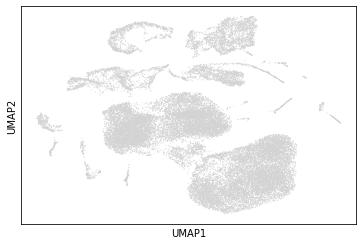

In [9]:
adtp = pp.quick_pre_vis(adt)

(15, 1)


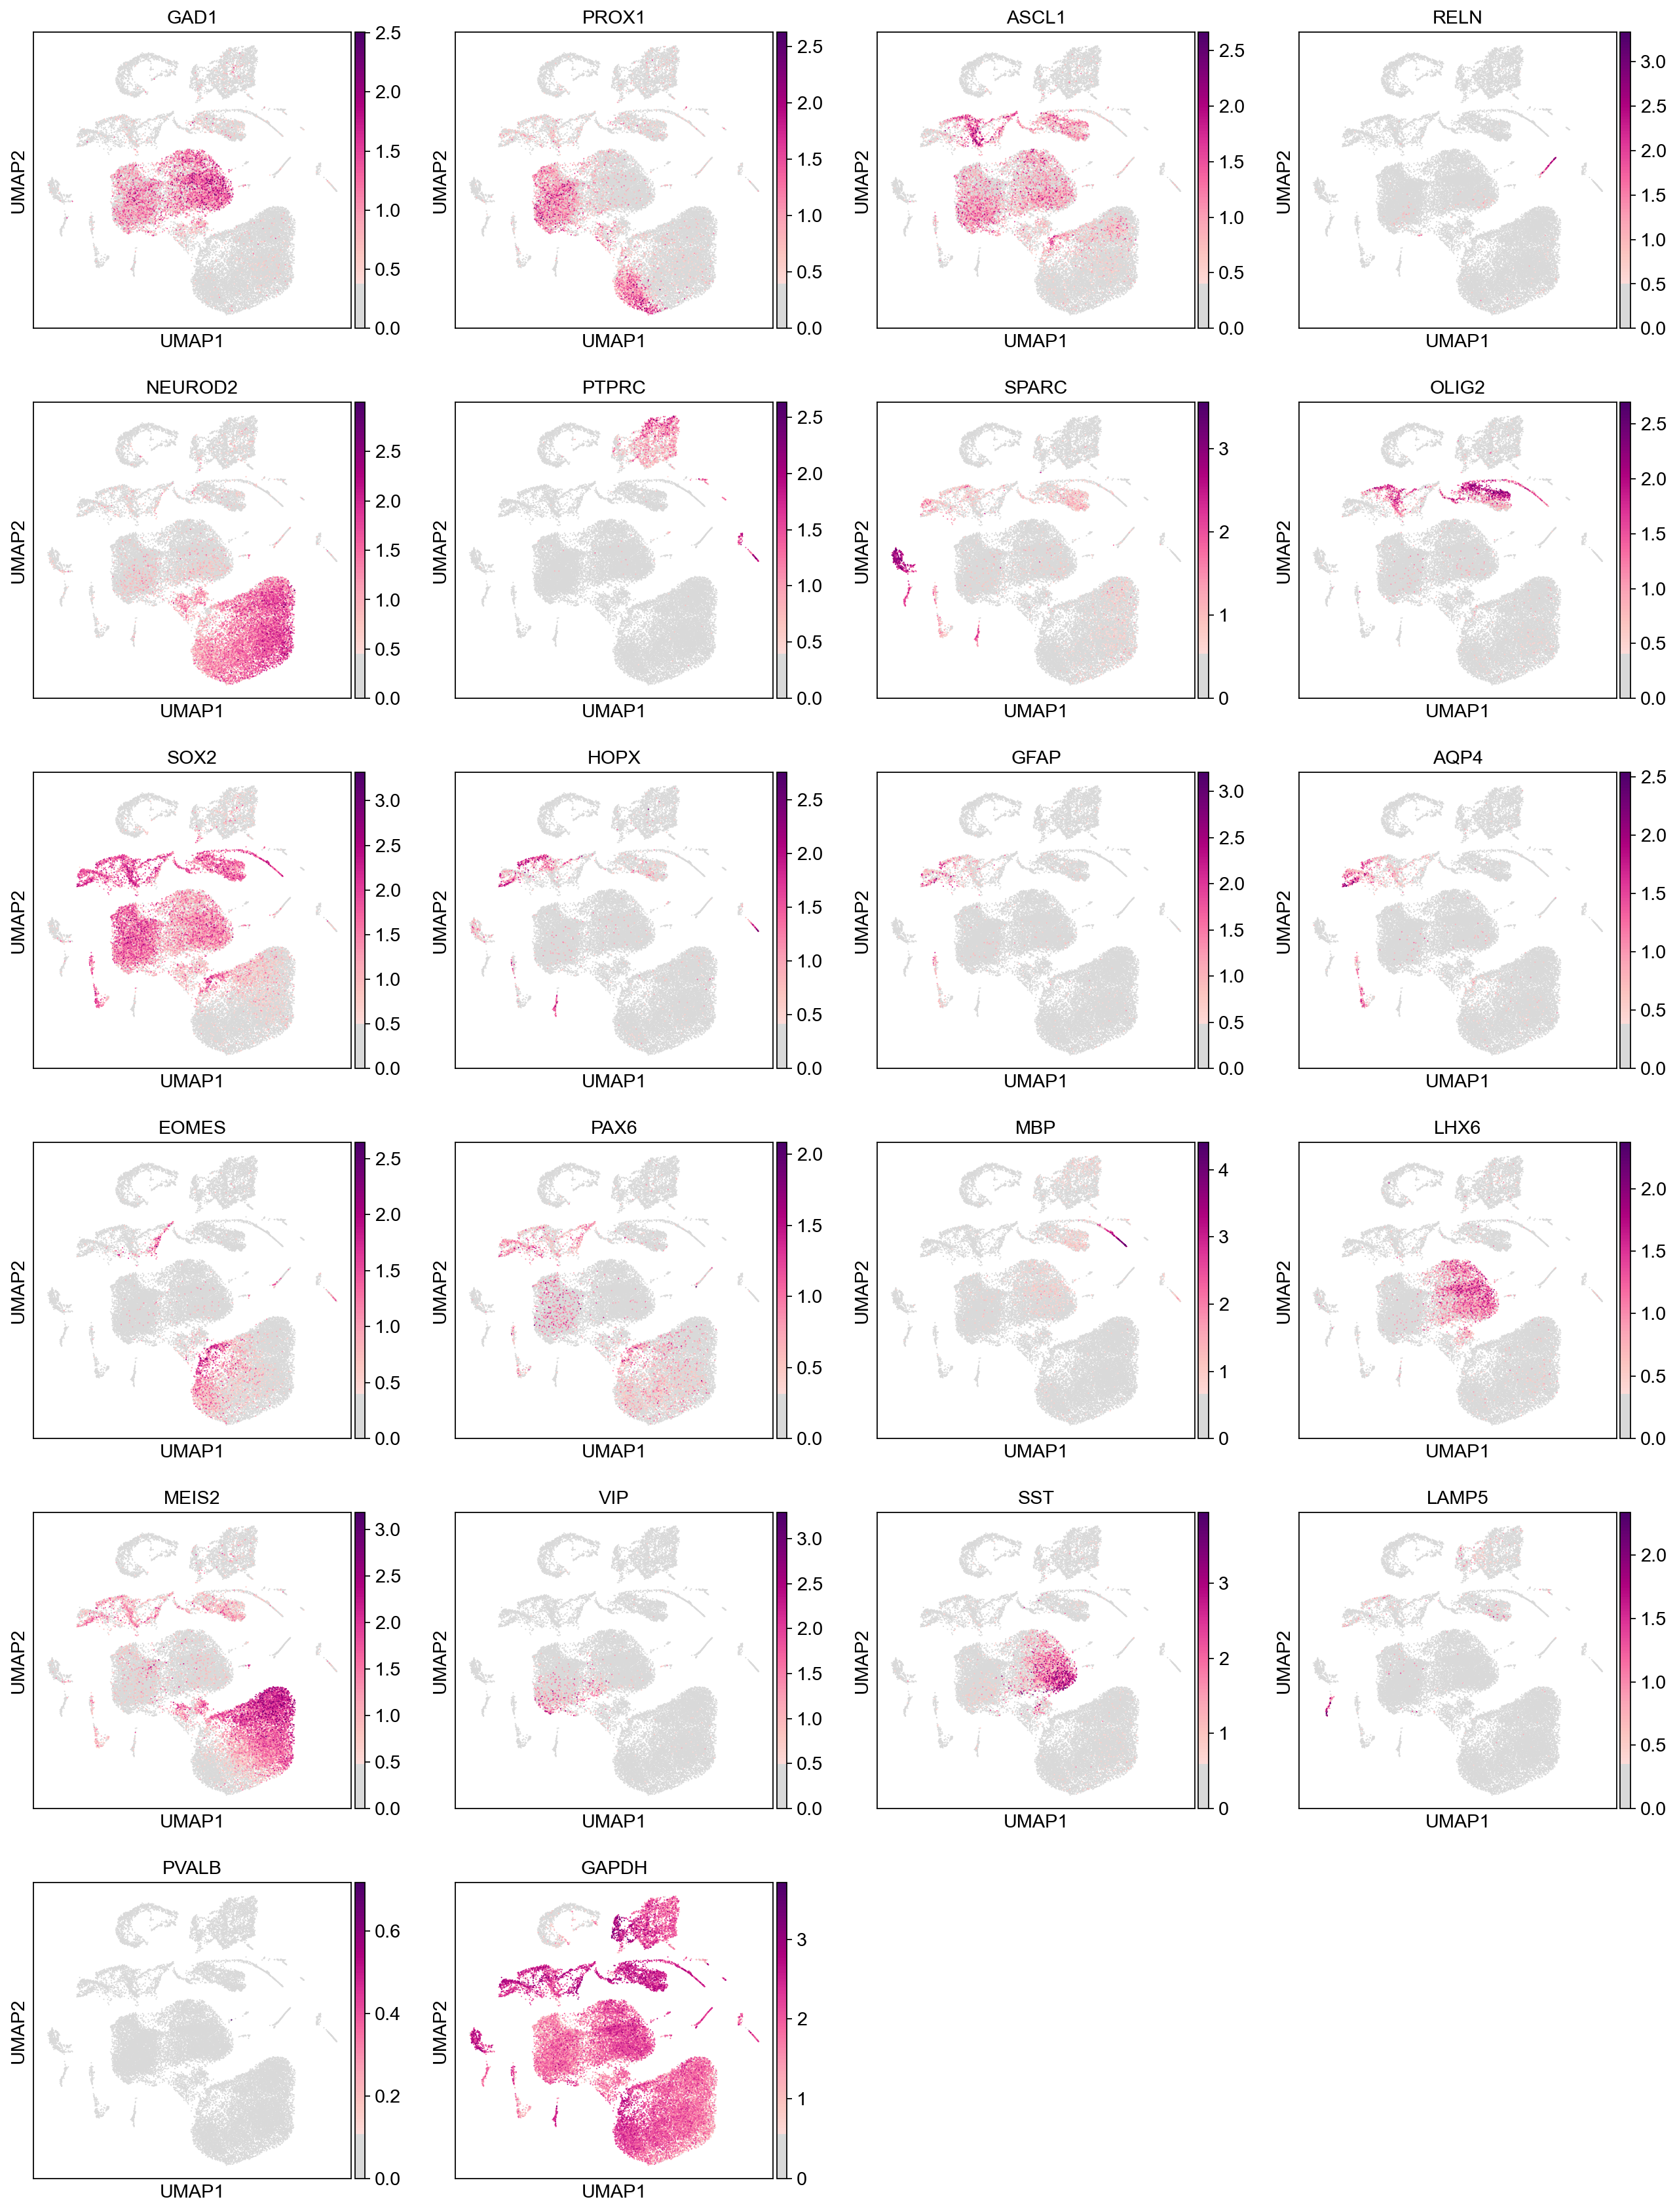

In [28]:
sc.set_figure_params(fontsize=13)
figdir = datadir / 'figs'
sc.settings.figdir = figdir

genes = ['GAD1', 'PROX1', 'ASCL1',
         'RELN', 'NEUROD2', 'PTPRC', 'SPARC', 
        'OLIG2', 'SOX2', 'HOPX', 'GFAP', 'AQP4', 
         'EOMES', 'PAX6',
         'MBP', 'LHX6', 'MEIS2',
         'VIP', 'SST', 'LAMP5', 'PVALB', 
         'GAPDH',
        ]

cmap = pl.diy_cmap_grey_bg()
sc.pl.umap(adtp, color=genes, color_map=cmap, save='-markers')

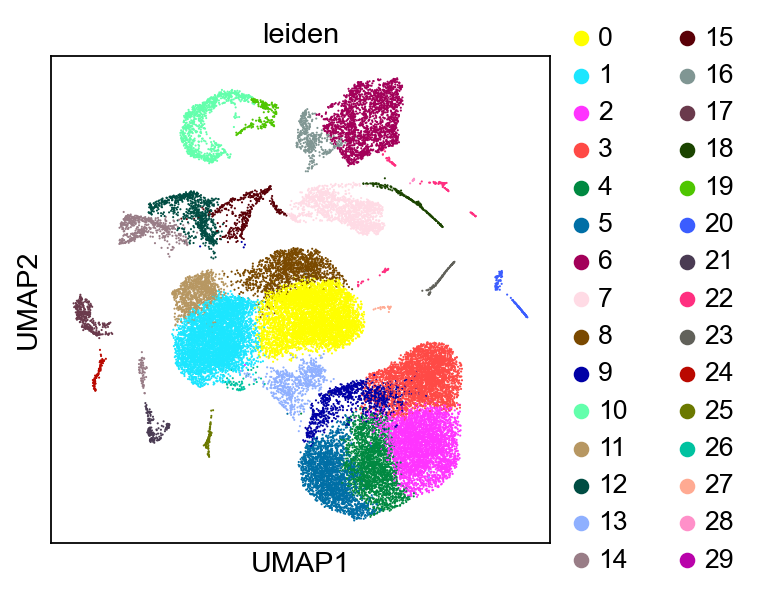

In [11]:
sc.tl.leiden(adtp, resolution=0.8)
sc.pl.umap(adtp, color='leiden', save='-leiden')

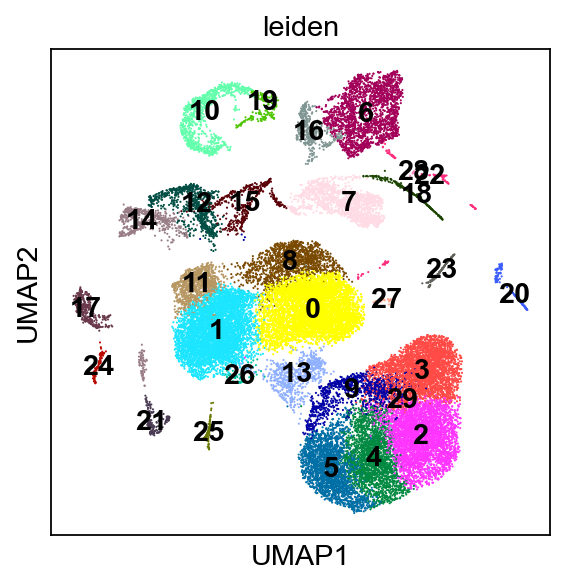

In [12]:
sc.pl.umap(adtp, color='leiden', legend_loc='on data', save='-leiden-nolegend')

In [22]:
g = 'ASLC1'
g = 'ASCL1'
[x for x in ginfo['Gene name'] if x in g]
# 'ENSG00000139352' in adt.var['ID']

['ASCL1']

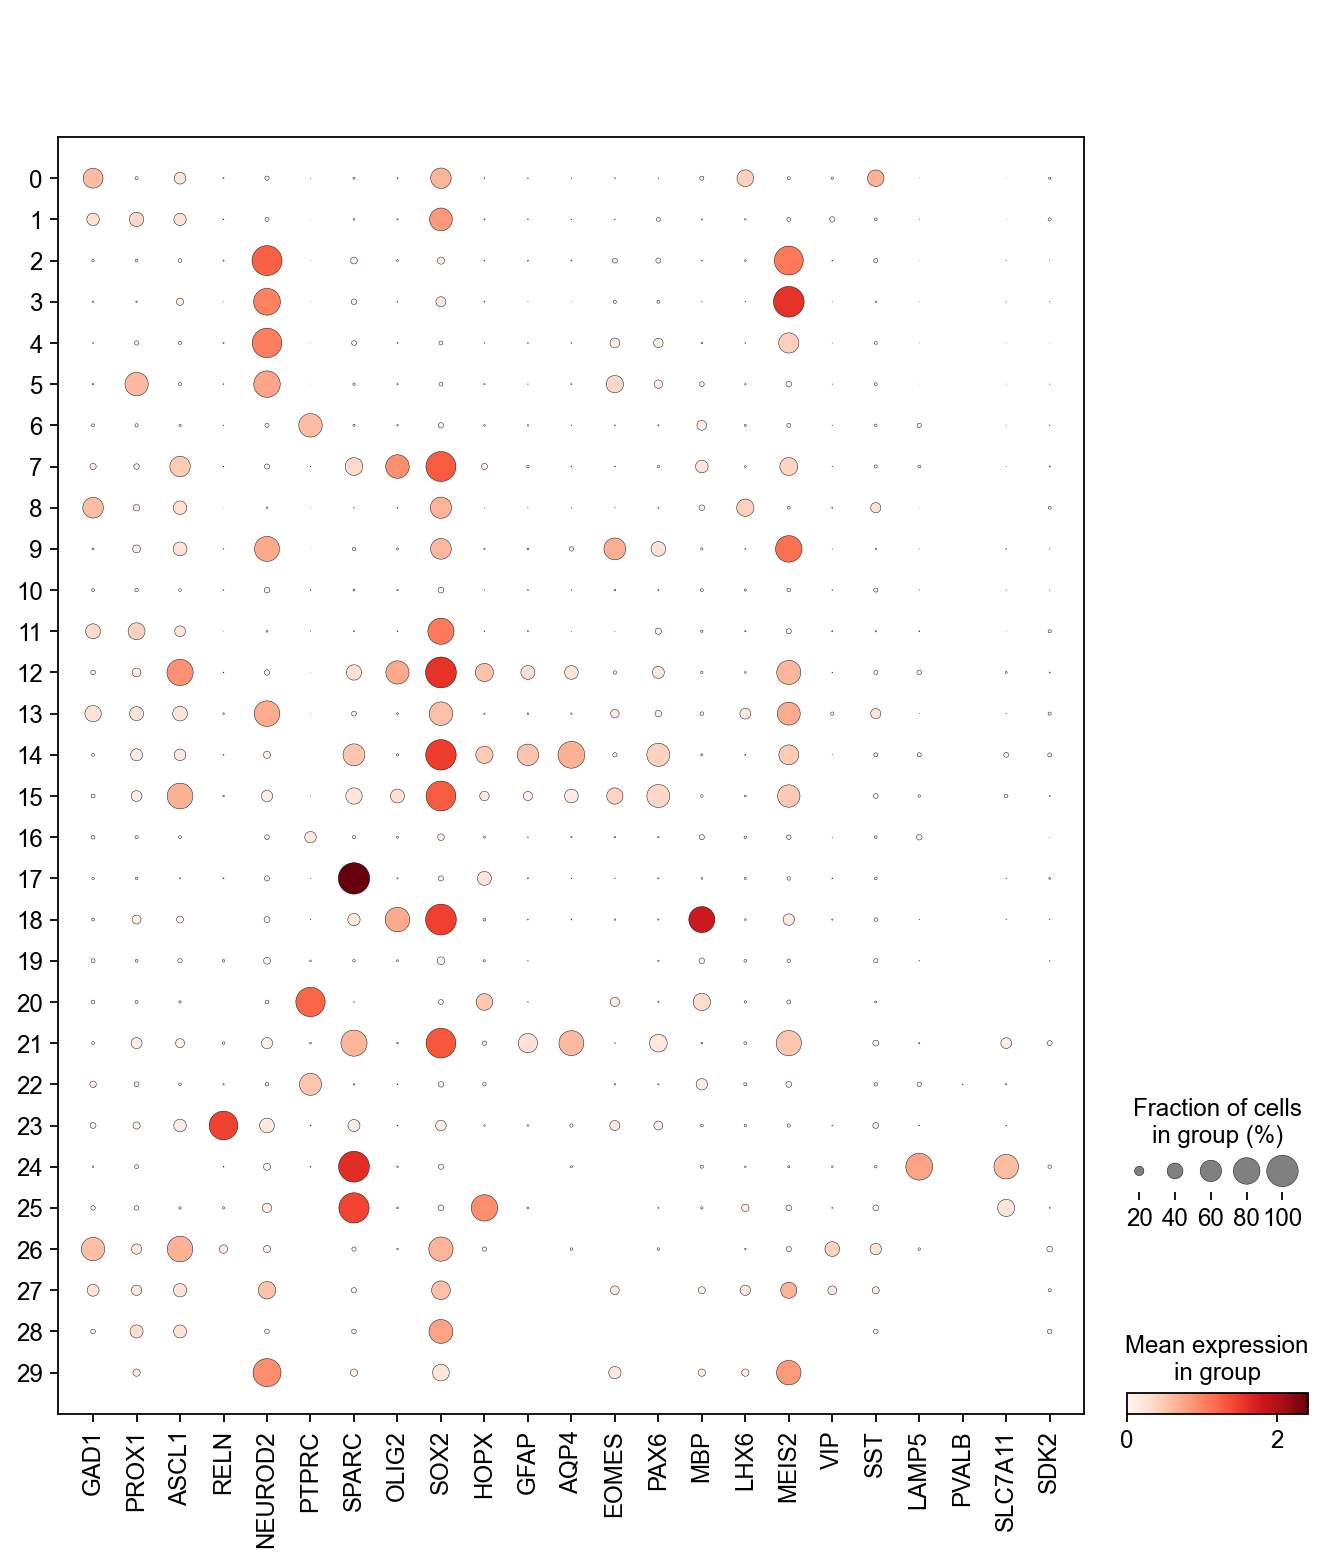

In [29]:
genes1 = genes[:-1] + ['SLC7A11', 'SDK2']
sc.pl.dotplot(adtp, genes1, groupby='leiden')

... storing 'anno1' as categorical


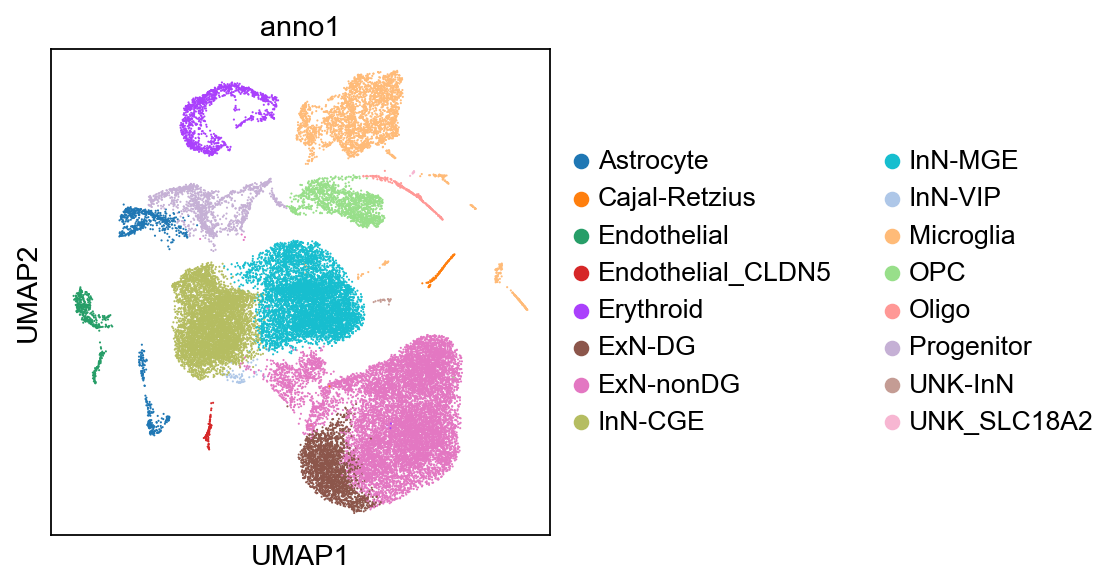

In [54]:
anno_map0 = {
    '23': 'Cajal-Retzius', # RELN
    '2': 'ExN-nonDG', # Non-DG; NEUROD2, MEIS2
    '3': 'ExN-nonDG', # Non-DG; NEUROD2, MEIS2
    '4': 'ExN-nonDG', # Non-DG; NEUROD2, MEIS2
    '9': 'ExN-nonDG', # Non-DG; NEUROD2, MEIS2
    '29': 'ExN-nonDG', # Non-DG; NEUROD2, MEIS2
    '13': 'ExN-nonDG', # Non-DG; NEUROD2, MEIS2
    '5': 'ExN-DG', # DG; NEUROD2, PROX1
    '0': 'InN-MGE', # GAD; SST
    '1': 'InN-CGE', # GAD; 
    '8': 'InN-MGE', # GAD
    '11': 'InN-CGE', # GAD
    '26': 'InN-VIP', # GAD
    '18': 'Oligo',  # MBP
    '7': 'OPC',  # OLIG2
    '12': 'Progenitor',  # ASCL1
    '15': 'Progenitor',  # ASCL1
    '6': 'Microglia',  # PTPRC
    '16': 'Microglia',  # PTPRC
    '20': 'Microglia',  # PTPRC
    '22': 'Microglia',  # PTPRC
    '14': 'Astrocyte', # AQP4
    '21': 'Astrocyte', # AQP4
    '17': 'Endothelial',  # APSRC
    '24': 'Endothelial',  # APSRC
    # uncertained
    '10': 'Erythroid', # HBB+, https://medlineplus.gov/genetics/gene/hbb/
    '19': 'Erythroid', # HBB+, https://medlineplus.gov/genetics/gene/hbb/
    '25': 'Endothelial_CLDN5', #  CLDN5, "a gene that encodes an important protein of the blood-brain barrier" (https://pubmed.ncbi.nlm.nih.gov/33838873/)
    '27': 'UNK-InN',  # InN-like
    '28': 'UNK_SLC18A2',  # ASCL1
}

tag = 'anno0'
tag = 'anno1'

adtp.obs[tag] = adtp.obs['leiden'].apply(lambda x: anno_map0.get(x, x))

sc.pl.umap(adtp, color=tag, save=f'-{tag}')# legend_loc='on data')

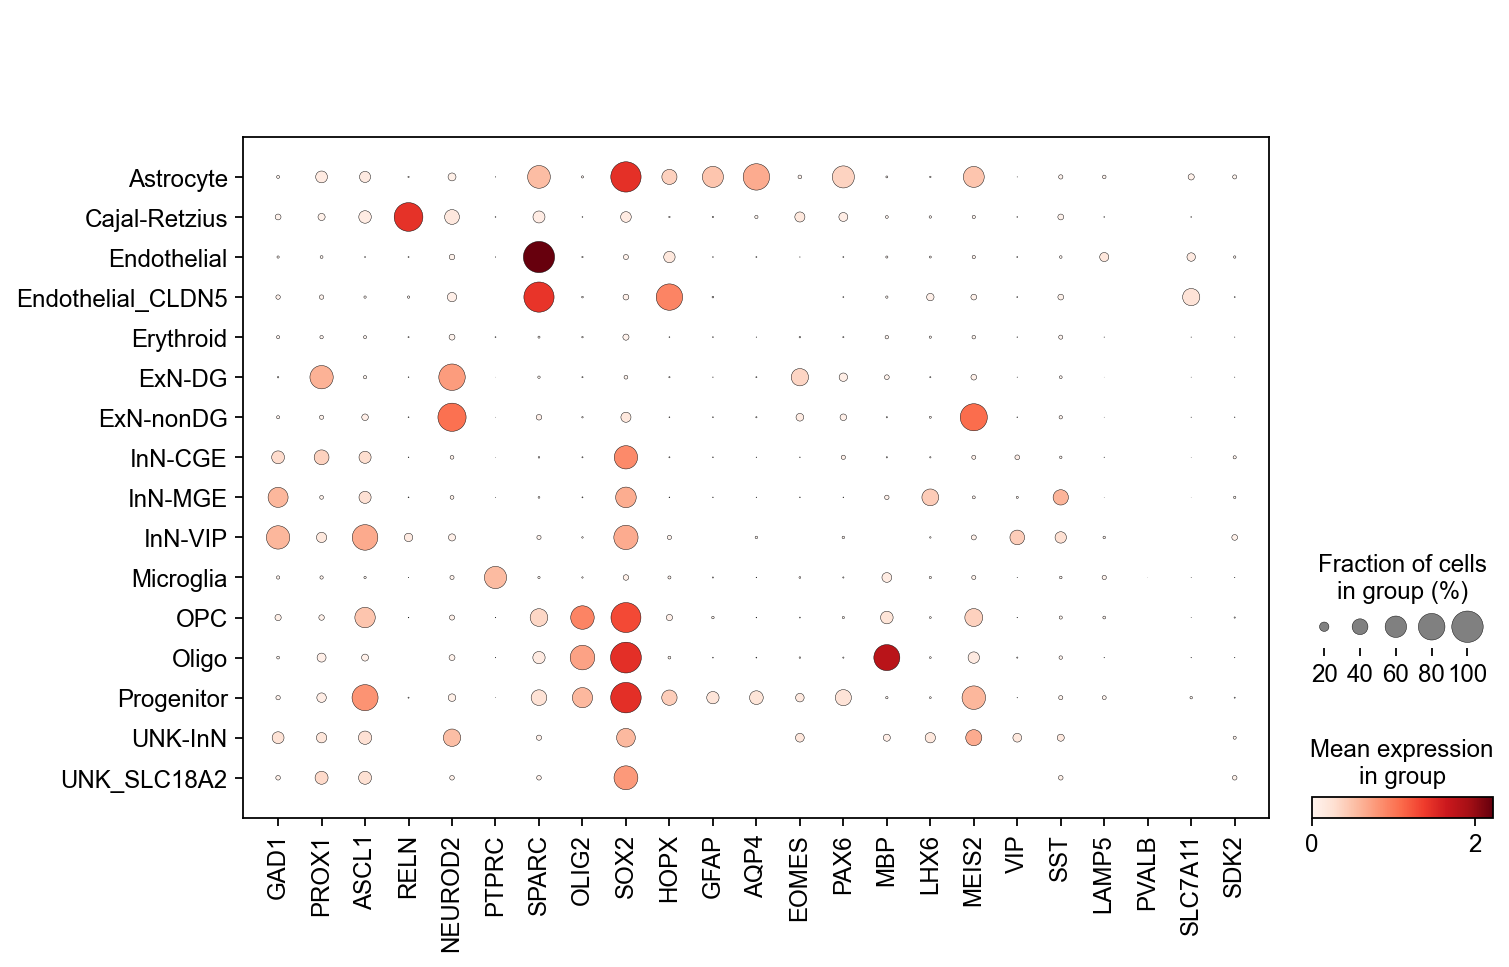

In [55]:
sc.pl.dotplot(adtp, genes1, groupby=tag)

In [56]:
sc.tl.rank_genes_groups(adtp, groupby=tag)

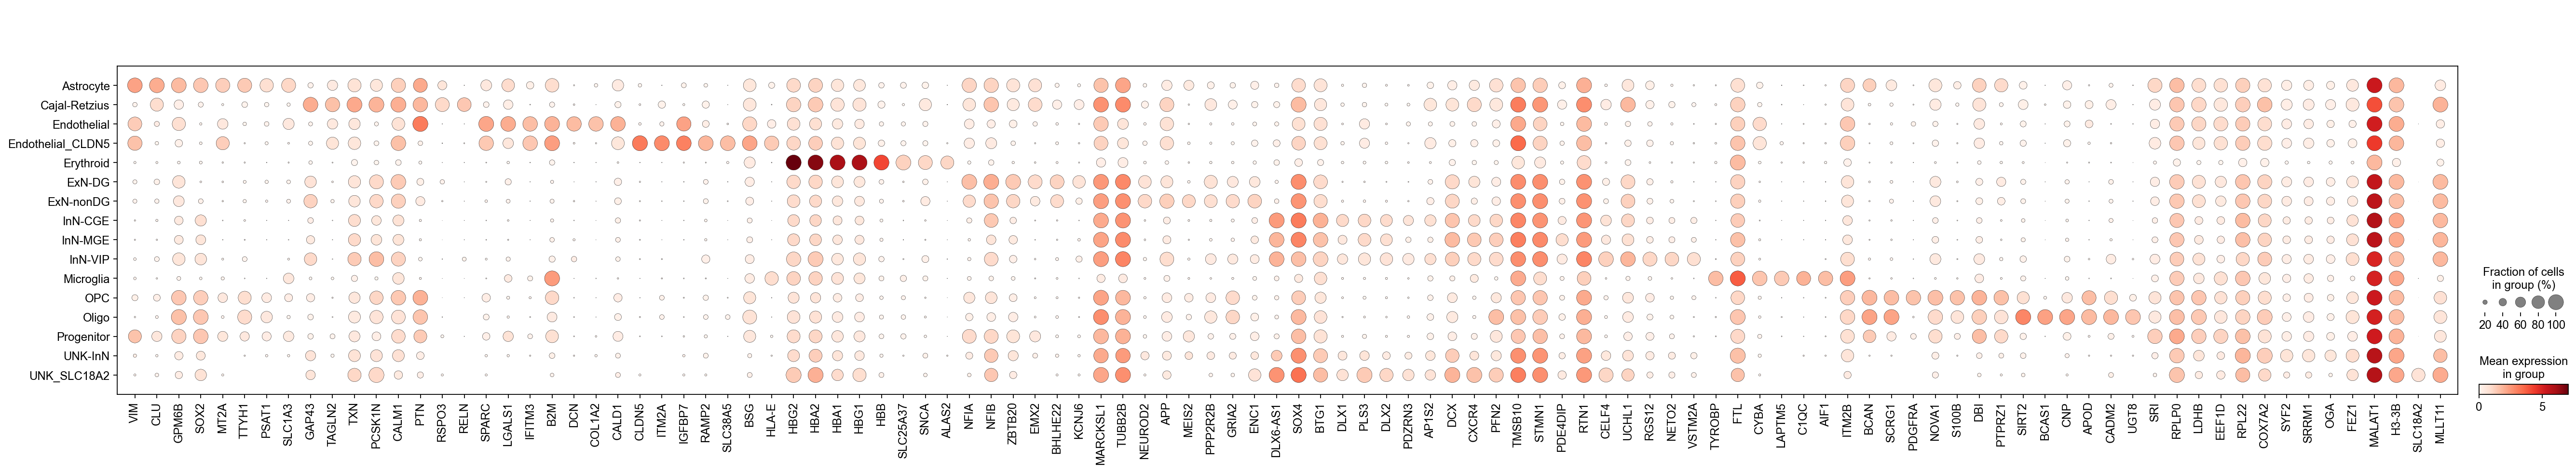

In [57]:
degs0 = pp.top_markers_from_adata(adtp, 8, unique=True)

sc.pl.dotplot(adtp, degs0, groupby=tag, save=f'-degs-{tag}')

... storing 'major_type' as categorical


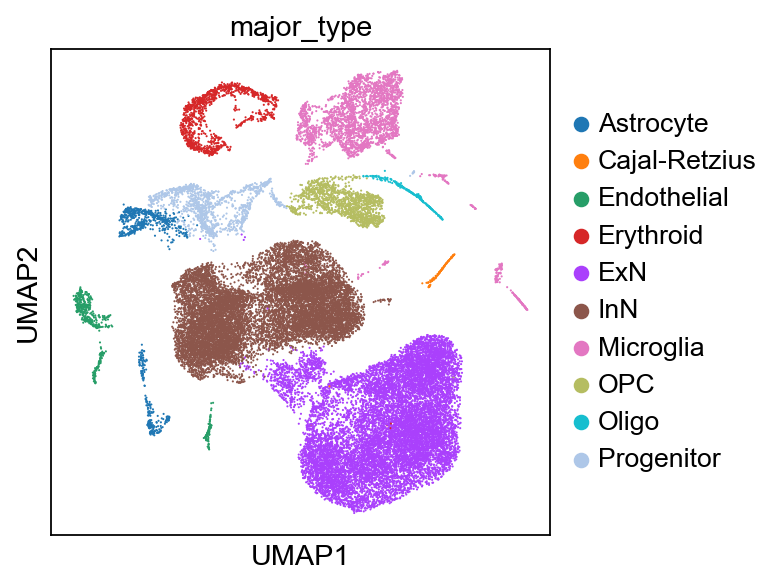

In [59]:
anno_map_major = {
    '23': 'Cajal-Retzius', # RELN
    '2': 'ExN', # Non-DG; NEUROD2, MEIS2
    '3': 'ExN', # Non-DG; NEUROD2, MEIS2
    '4': 'ExN', # Non-DG; NEUROD2, MEIS2
    '9': 'ExN', # Non-DG; NEUROD2, MEIS2
    '29': 'ExN', # Non-DG; NEUROD2, MEIS2
    '13': 'ExN', # Non-DG; NEUROD2, MEIS2
    '5': 'ExN', # DG; NEUROD2, PROX1
    '0': 'InN', # GAD; SST
    '1': 'InN', # GAD; 
    '8': 'InN', # GAD
    '11': 'InN', # GAD
    '26': 'InN', # GAD
    '18': 'Oligo',  # MBP
    '7': 'OPC',  # OLIG2
    '12': 'Progenitor',  # ASCL1
    '15': 'Progenitor',  # ASCL1
    '6': 'Microglia',  # PTPRC
    '16': 'Microglia',  # PTPRC
    '20': 'Microglia',  # PTPRC
    '22': 'Microglia',  # PTPRC
    '14': 'Astrocyte', # AQP4
    '21': 'Astrocyte', # AQP4
    '17': 'Endothelial',  # APSRC
    '24': 'Endothelial',  # APSRC
    # uncertained
    '10': 'Erythroid', # HBB+, 血红蛋白 https://medlineplus.gov/genetics/gene/hbb/
    '19': 'Erythroid', # HBB+, https://medlineplus.gov/genetics/gene/hbb/
    '25': 'Endothelial', #  CLDN5, "a gene that encodes an important protein of the blood-brain barrier" (https://pubmed.ncbi.nlm.nih.gov/33838873/)
    # unknown (做参考数据的时候可以去掉)
    '27': 'InN', #'UNK-InN',  # InN-like
    '28': 'Progenitor', # 'UNK_SLC18A2',  # ASCL1
}

tag = 'major_type'

adtp.obs[tag] = adtp.obs['leiden'].apply(lambda x: anno_map_major.get(x, x))

sc.pl.umap(adtp, color=tag, save=f'-{tag}')# legend_loc='on data')

In [60]:
adt,adtp

(AnnData object with n_obs × n_vars = 33128 × 32738
     var: 'ID', 'name',
 AnnData object with n_obs × n_vars = 33128 × 2000
     obs: 'leiden', 'anno0', 'anno1', 'major_type'
     var: 'ID', 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'anno0_colors', 'rank_genes_groups', 'anno1_colors', 'major_type_colors'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     obsp: 'distances', 'connectivities')

In [80]:
for c in adtp.obs.columns:
    adt.obs[c] = adtp.obs[c] 
adt.obs['UMAP_1'] = adtp.obsm['X_umap'][:, 0]
adt.obs['UMAP_2'] = adtp.obsm['X_umap'][:, 1]
adt.obsm['X_umap'] = adtp.obsm['X_umap']
adt

AnnData object with n_obs × n_vars = 33128 × 32738
    obs: 'leiden', 'anno0', 'anno1', 'major_type', 'UMAP_1', 'UMAP_2'
    var: 'ID', 'name'
    obsm: 'X_umap'

In [72]:
adt.var.index.name = 'index'

In [82]:
adt.write(datadir / 'raw-humanHipp_labeled.h5ad')

In [76]:
adtp.var.index.name = 'index'
adtp.raw.var.index.name = 'index'

In [77]:
adtp.write('analyzed-humanHipp.h5ad')

## TEST

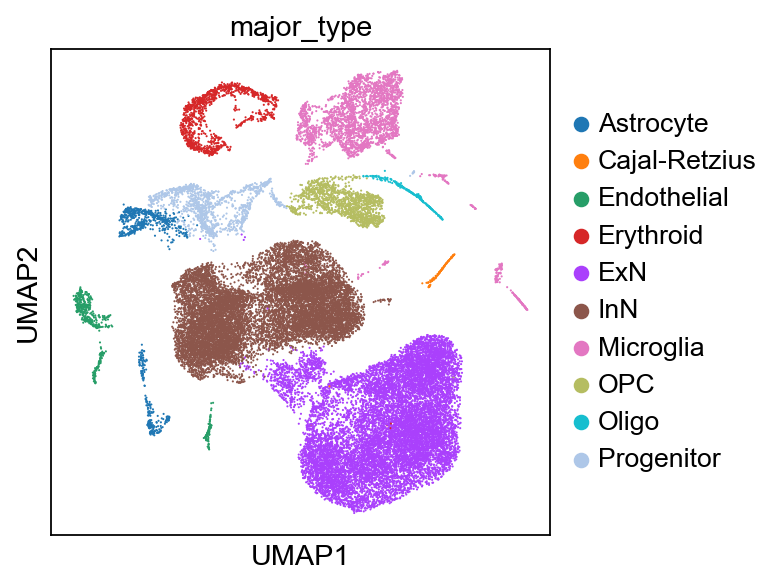

AnnData object with n_obs × n_vars = 33128 × 32738
    obs: 'leiden', 'anno0', 'anno1', 'major_type', 'UMAP_1', 'UMAP_2'
    var: 'ID', 'name'
    uns: 'major_type_colors'
    obsm: 'X_umap'

In [83]:
tmp = sc.read(datadir / 'raw-humanHipp_labeled')
sc.pl.umap(tmp, color='major_type')
tmp